In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf

import pywt

pywt.families(short = False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [12]:
ticker = 'TLT'
data = yf.download(ticker, progress=False)
close_data = data['Adj Close']
returns = close_data.pct_change().dropna().loc["2020-01-01":]  # This is going to be our signal for the wavelets

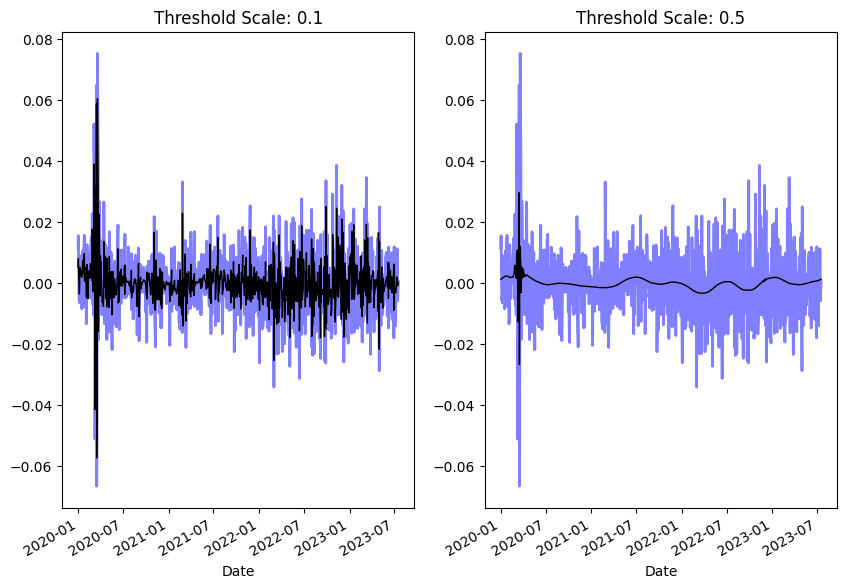

In [13]:
wavelet = "db6"
fig, axes = plt.subplots(1, 2, figsize = (10, 7))
for i, scale in enumerate([.1, .5]):
    coefficients = pywt.wavedec(returns, wavelet, mode='per')
    coefficients[1:] = [pywt.threshold(i, value=scale*returns.max(), mode='soft') for i in coefficients[1:]]
    
    reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
    returns.plot(color="b", alpha=0.5, label='original signal', lw=2,
                title=f'Threshold Scale: {scale:.1f}', ax=axes[i])
    pd.Series(reconstructed_signal, index=returns.index).plot(c='k',
    label='DWT smoothing}', linewidth=1, ax=axes[i])